<h1><center>MiniPro1_Multi_file</center></h1>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [3]:
def func(x, a, b, c):
        return (a*np.exp(-b*x)+c)

## Curving Fitting Data:

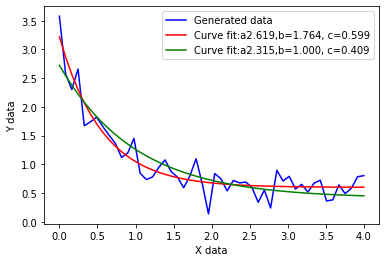

In [4]:
x_data = np.linspace(0, 4, 50)
y = func(x_data, 2.5, 1.3, 0.5)

rng = np.random.default_rng()

y_noise= 0.2*rng.normal(size=x_data.size)

y_data = y+ y_noise

plt.plot (x_data, y_data, 'b-', label='Generated data')

popt, pcov = curve_fit(func, x_data, y_data)
plt.plot(x_data, func(x_data, *popt),'r-', label = 'Curve fit:a%5.3f,b=%5.3f, c=%5.3f' % tuple(popt))

popt, pcov = curve_fit(func, x_data, y_data, bounds=(0,[3.0, 1.0, 0.5]))
plt.plot(x_data, func(x_data, *popt),'g-', label = 'Curve fit:a%5.3f,b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('X data')
plt.ylabel('Y data')
plt.legend()
plt.show()

In [5]:
xd = np.arange(10)
yd = np.array([0,1,2,3,4,5,4,3,2,1])

mean = sum(xd * yd) / sum(yd)
sigma= np.sqrt(sum(yd *(xd-mean)**2) / sum(yd))


## Gaussian Fit:

In [6]:
def gauss(x, a, x0, sigma):
    return a* np.exp(-(x-x0)**2 / (2 * sigma**2))

popt, pcov = curve_fit (gauss, xd, yd, p0 = [max(yd), mean, sigma])

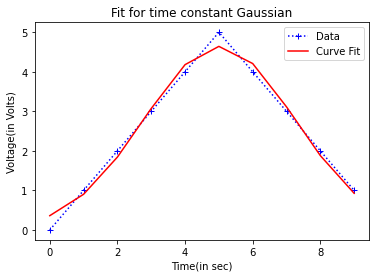

In [7]:
plt.plot(xd, yd, 'b+:', label='Data')
plt.plot(xd, gauss(xd, *popt),'r-',label='Curve Fit')
plt.legend()
plt.title('Fit for time constant Gaussian')
plt.xlabel('Time(in sec)')
plt.ylabel('Voltage(in Volts)')
plt.show()

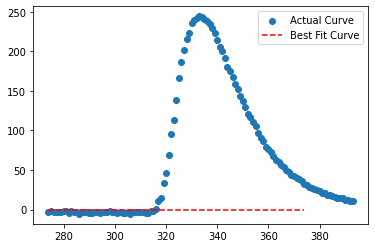

In [13]:
def lognorm( x, mu, sigma):
    return 1/(np.sqrt(2*np.pi)*sigma*x)*np.exp(-((np.log(x)-mu)**2)/(2*sigma**2))


data = np.loadtxt('C:/Users/HP/Mini Project Data/file_3.txt')
x ,y =data[:, 0], data[:, 1]

popt, _ =curve_fit(lognorm, x, y)

mu, sigma = popt

plt.scatter(x, y)

x_line = np.arange(min(x), max(x), 20)
y_line = lognorm(x_line, mu, sigma)

plt.plot(x_line, y_line, '--', color='red')
plt.legend(['Actual Curve',"Best Fit Curve"], loc="best")
plt.show()

350.7235432525951 14.31440054687221


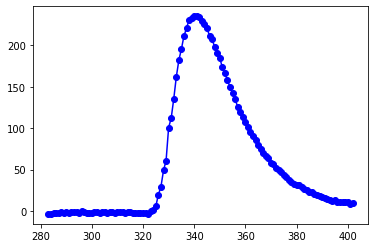

In [17]:
data = np.loadtxt('C:/Users/HP/Mini Project Data/file_4.txt')
x ,y =data[:, 0], data[:, 1]

def gauss(x, a, x0, sigma):
    return a* np.exp(-(x-x0)**2 / (2 * sigma**2))

x1 = np.array(x)
n = len(x1)
mean = sum(x * y)/  sum(y)             
sigma= np.sqrt(sum(y *(x-mean)**2) / sum(y))
print(mean, sigma)

popt, pcov = curve_fit (gauss, x, y, p0 = [1, mean, sigma])

plt.plot(x,y, '-ob', label='Our Data');

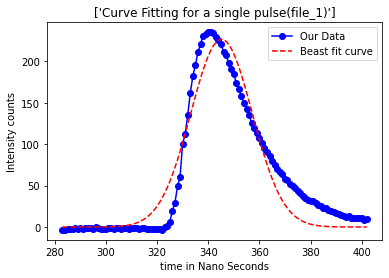

In [18]:
plt.plot(x,y,'-ob', label='Our Data');
plt.plot(x,gauss(x, *popt),'r--',label='Beast fit curve')
plt.legend()
plt.title(['Curve Fitting for a single pulse(file_1)'])
plt.xlabel('time in Nano Seconds')
plt.ylabel('Intensity counts')
plt.show()